# Model: Logistic Regression

## Imports and Useful Paths

In [1]:
# Helper libraries
import warnings

# Scientific and visual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Various settings
warnings.filterwarnings("ignore")
np.set_printoptions(precision=4)
sns.set_theme()
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_colwidth", 40)
pd.set_option("display.precision", 4)
pd.set_option("display.max_columns", None)

In [2]:
from churn_detection.paths import TRANSFORMED_DATA_DIR

## Loading and Preparing Datasets

In [3]:
from churn_detection.utils import load_datasets, get_feature_names

In [4]:
train_data, val_data = load_datasets(names=["train", "validation"])
numeric_variables, categorical_variables = get_feature_names(train_data)

In [5]:
X_train, y_train = train_data.drop(columns="churn"), train_data.churn
X_val, y_val = val_data.drop(columns="churn"), val_data.churn

## Data Modeling

### Numeric Feature Scaling

In [8]:
from churn_detection.features import (add_transformation, 
                                      create_column_preprocessor, 
                                      DummyNumericTransformer, 
                                      SimpleCategoryEncoder, 
                                      create_pipe)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [9]:
transformers = []
transformers.append(
    add_transformation(
        name="continuous", 
        variables=numeric_variables,
        steps=[
            ("dummy_num", StandardScaler()),
        ]
    )
)
transformers.append(
    add_transformation(
        name="discrete", 
        variables=categorical_variables,
        steps=[
            ("dummy_cat", SimpleCategoryEncoder()),
        ]
    )
)

In [10]:
preprocessor = create_column_preprocessor(transformers)

In [11]:
lr = create_pipe(
    preprocessor, LogisticRegression()
)
lr.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('dummy_num',
                                                                   StandardScaler())]),
                                                  ['tenure', 'monthlycharges',
                                                   'totalcharges']),
                                                 ('discrete',
                                                  Pipeline(steps=[('dummy_cat',
                                                                   SimpleCategoryEncoder())]),
                                                  ['gender', 'seniorcitizen',
                                                   'partner', 'dependents',
                                                   'phoneservice',
                                                   'multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport', 'streamingtv',
                                                   'streamingmovies',
                                                   'contract',
                                                   'paperlessbilling',
                                                   'paymentmethod'])])),
                ('estimator', LogisticRegression())])

### Model Evaluation

In [14]:
from churn_detection.evaluation import display_roc_auc_score, display_clf_report
from churn_detection.visualization import plot_roc_curve, plot_confusion_table

In [15]:
# Train Data
display_roc_auc_score(lr, X_train, y_train)

ROC AUC score: 0.73


In [16]:
# Validatio Data
display_roc_auc_score(lr, X_val, y_val)

ROC AUC score: 0.72


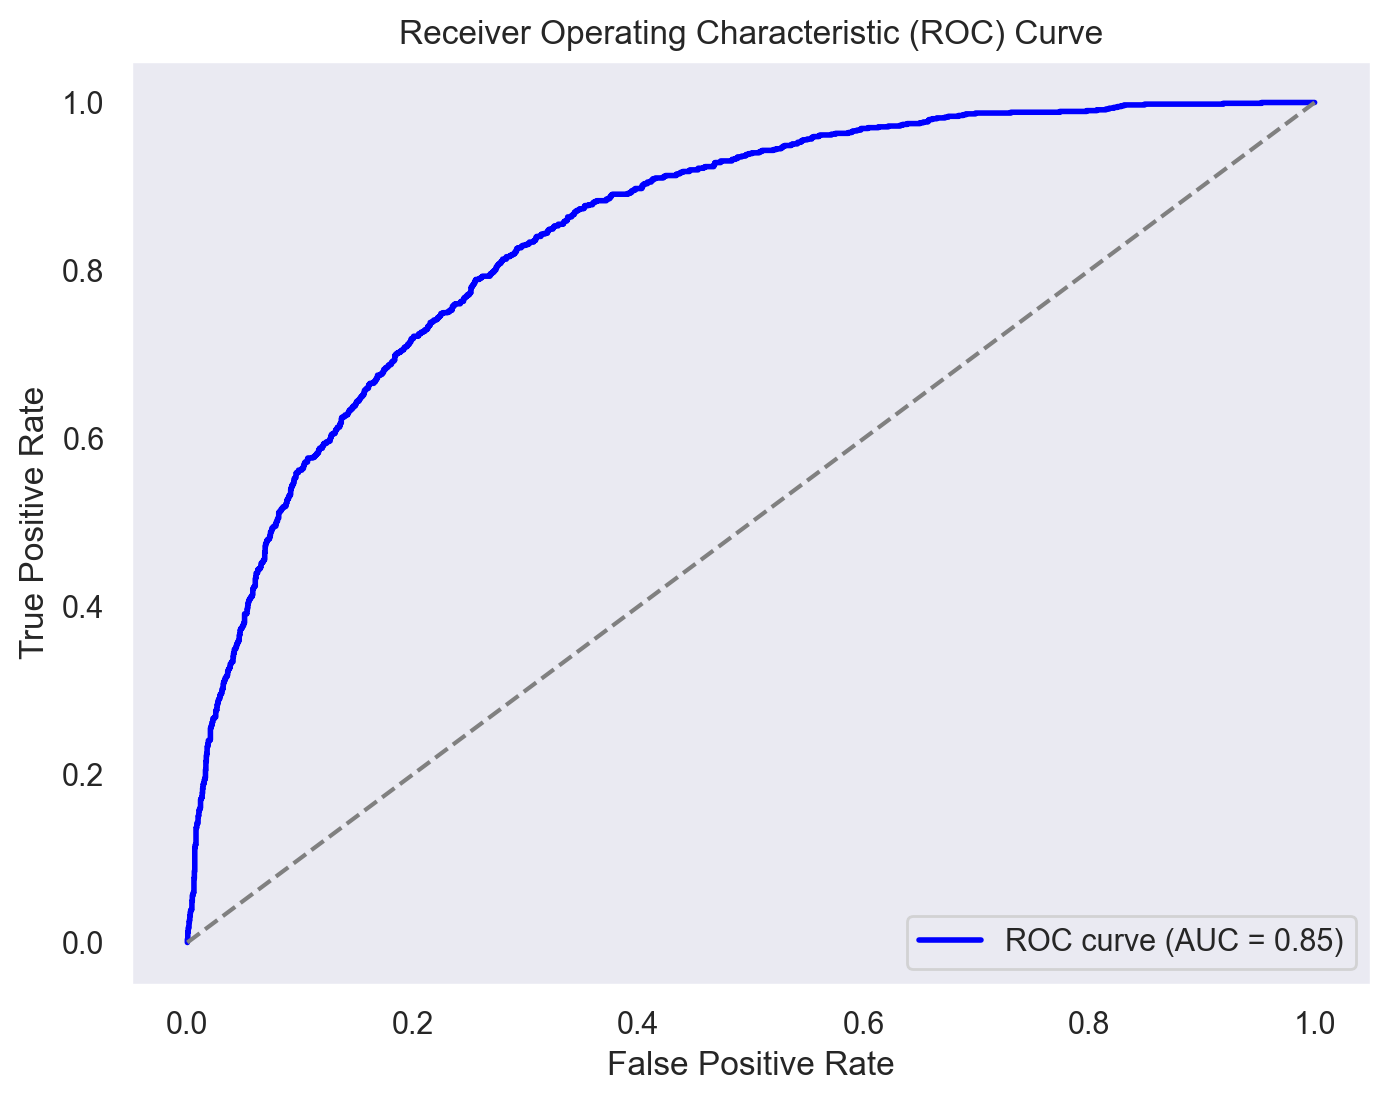

In [17]:
plot_roc_curve(lr, X_train, y_train)

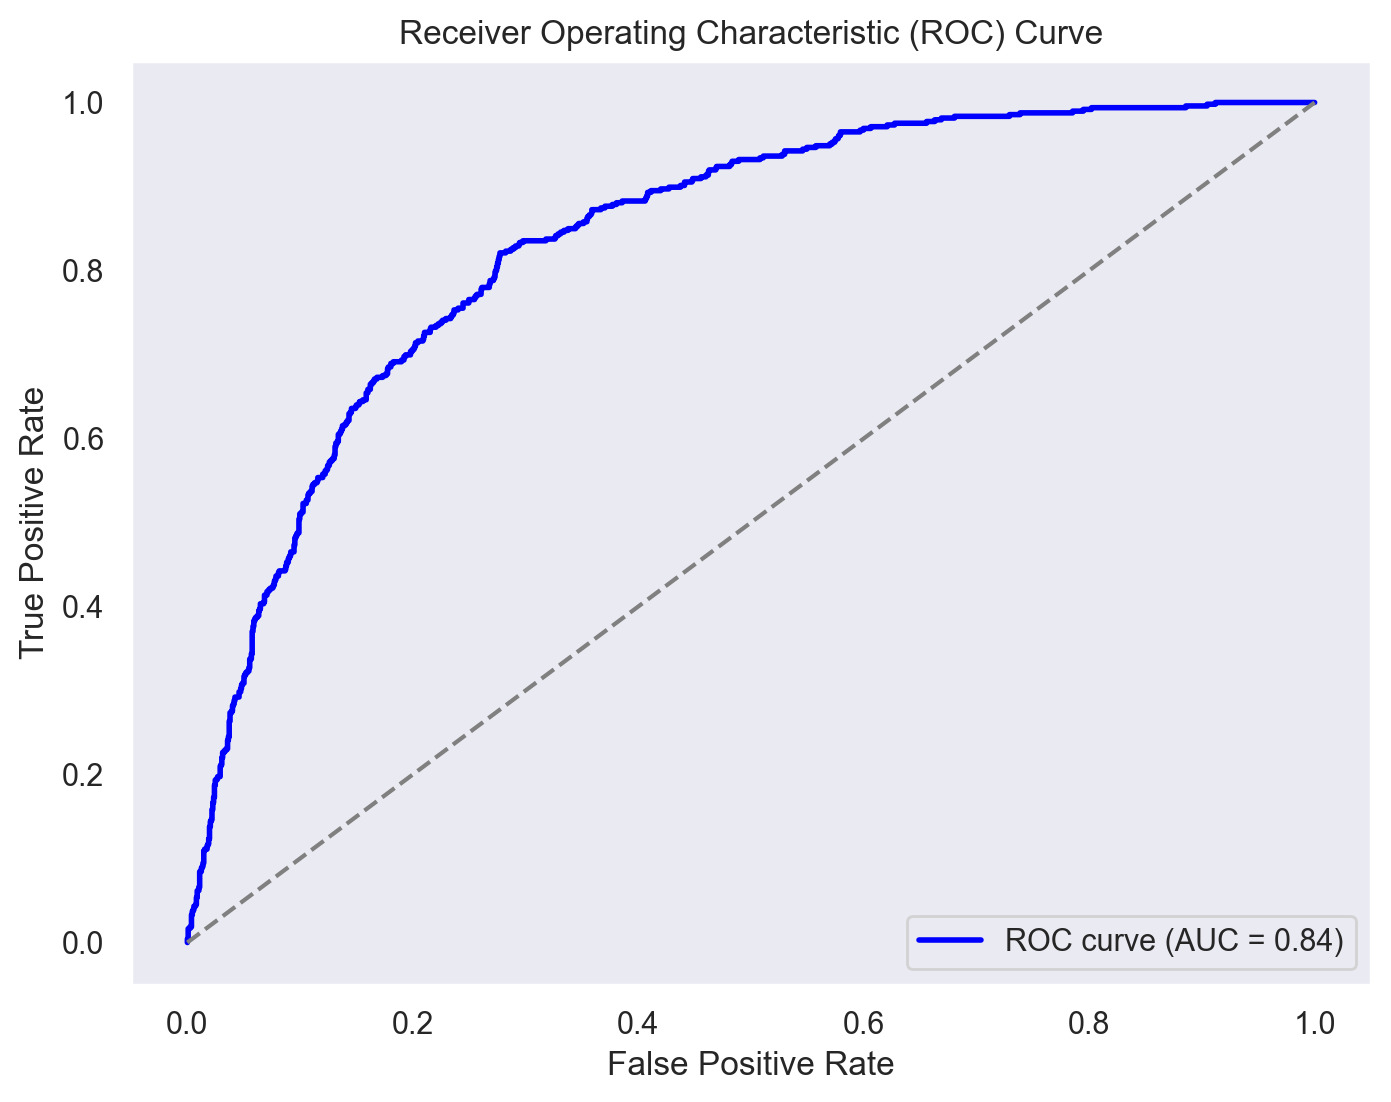

In [18]:
plot_roc_curve(lr, X_val, y_val)

In [19]:
display_clf_report(lr.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2739
           1       0.67      0.57      0.62      1035

    accuracy                           0.81      3774
   macro avg       0.76      0.73      0.74      3774
weighted avg       0.80      0.81      0.80      3774



In [20]:
display_clf_report(lr.predict(X_val), y_val)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1374
           1       0.61      0.58      0.59       486

    accuracy                           0.79      1860
   macro avg       0.73      0.72      0.73      1860
weighted avg       0.79      0.79      0.79      1860



### Error Inspection

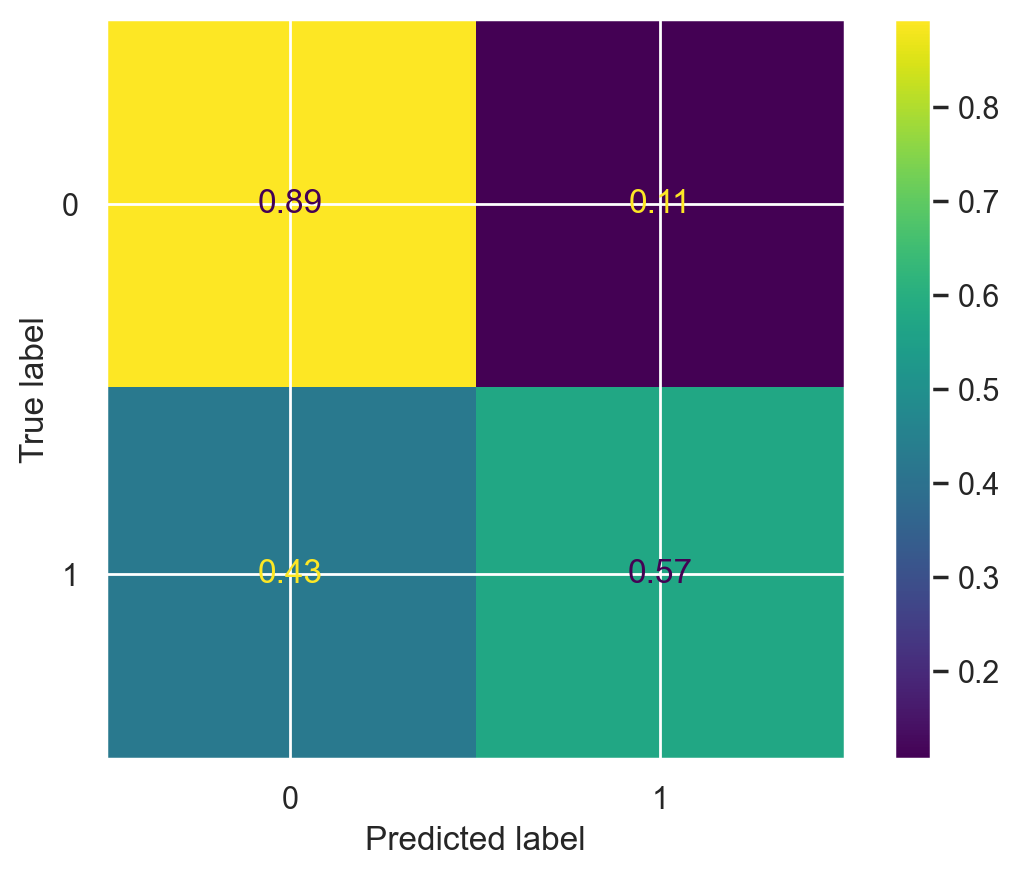

In [21]:
# Train Set
plot_confusion_table(y_train, lr.predict(X_train))

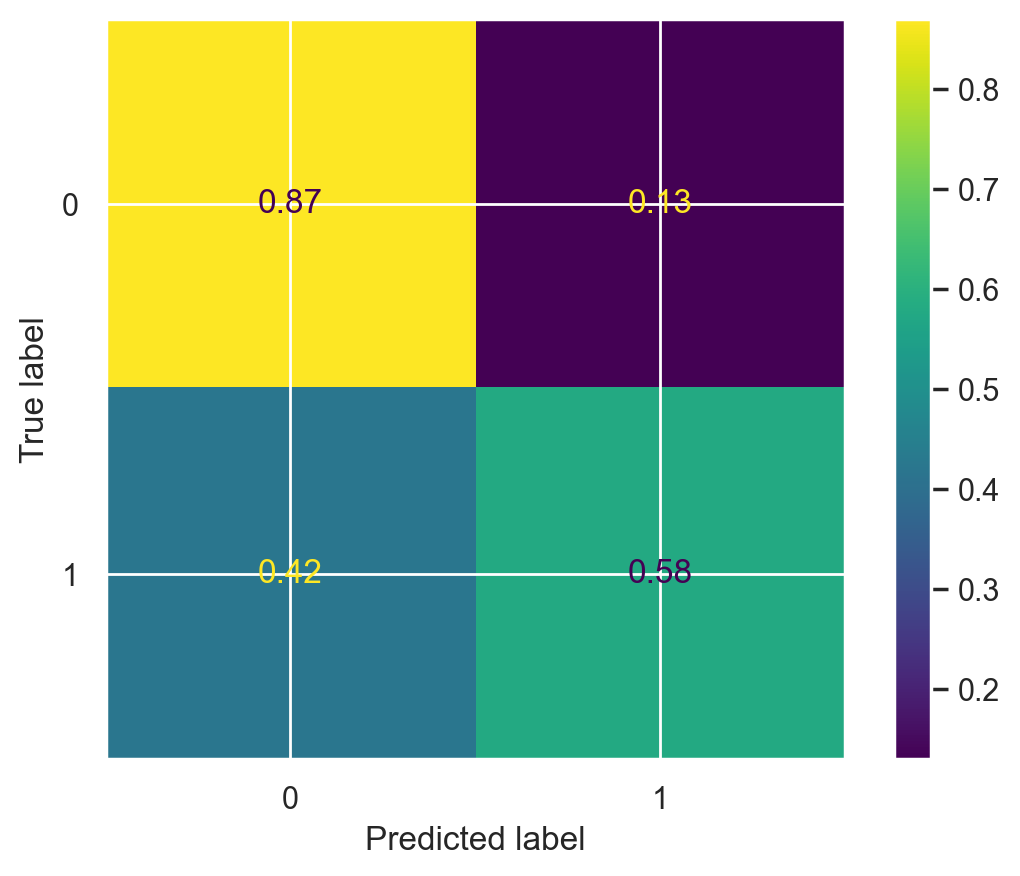

In [22]:
# Validation Set
plot_confusion_table(y_val, lr.predict(X_val))

This classifier's ability to predict the positive class as the positive class is slightly better than baseline.